<a href="https://colab.research.google.com/github/mptorpo/integracion_prospectiva_y_datos/blob/main/Reto_1_Miguel_Pimiento_Restrepo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Reto 1: FINTECH**
- Miguel Pimiento Restrepo
- EPIK ID: 1000293648

- **Caso de Estudio:** Modelamiento del riesgo derivado de las operaciones del negocio de una FINTECH.
- **Objetivos del Negocio:** Una FINTECH quiere estimar las pérdidas asociadas con el riesgo derivado de los fallos tecnológicos en transacciones de sus clientes a través de sus canales electrónicos.
- **Abstracción:** Para la caracterización del Riesgo Operacional es necesario:
1. Caracterización de la Distribución Agregada de Pérdidas (LDA) y sus parámetros de riesgo asociados (Pérdidas Esperadas, Pérdidas No Esperadas, Pérdidas Catastróficas).
2. Estimar las medidas de dispersión y tendencia central de la distribución agregada de pérdidas (Media, Varianza, Curtosis, Asimetría).
3. La FINTECH quiere hacer un muestreo de las variables aleatorias de frecuencia y severidad a una confiabilidad del 99,9% utilizando el método de Montecarlo.

- **Técnica para utilizar:**
1. Para identificar la estructura experimental de los datos, se utilizará como referencia el método de Montecarlo.
2. Para la evaluación de la integración de los datos se utilizarán como referencia las métricas: Media, Varianza, Coeficiente de Asimetría y Kurtosis.

0. Cargar las librerias de trabajo

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns #Trabajo estadístico
import matplotlib.pyplot as plt #Trabajos gráficos

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se cargan los archivos de trabajo

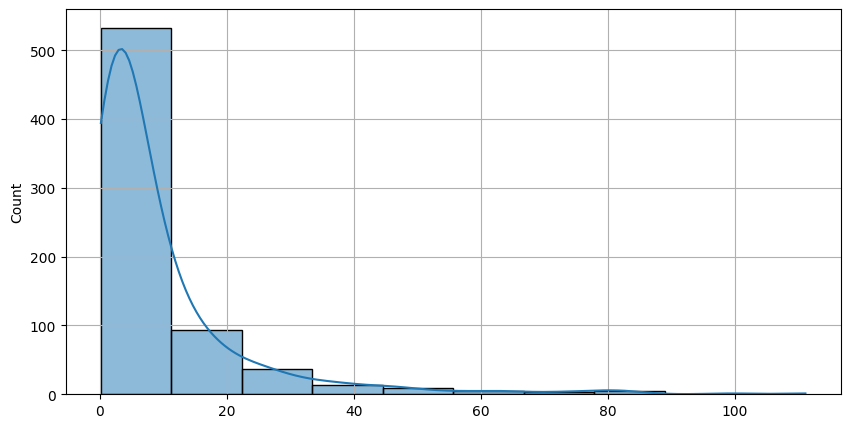

In [6]:
nxl = '/content/drive/MyDrive/Colab Notebooks/1. FallasTecnológicas.xlsx'
XDB = pd.read_excel(nxl, sheet_name=0)
XDB.head(10)

#Procedemos con la construcción de la distribución agregada de las perdidas
# Skip the header row (index 0) and convert to float
Freq = XDB.iloc[1:, 3].astype(float)
Sev = XDB.iloc[1:, 4].astype(float)
LDA = Freq * Sev

#Se procede con la construcción de la distribución agregada de las pérdidas
plt.figure(figsize=(10,5))
sns.histplot(LDA, bins = 10, kde = True)
plt.grid()
plt.show()

2. Se procede con la clusterización estadistica. La clusterizacion estadistica esta definida por el Histograma de Frecuencias.

In [7]:
np.set_printoptions(suppress = True) #Mostrar solo dos decimales

NI = 10 #Indica el # de clusters
counts, bin_edges = np.histogram(LDA, bins = NI)

print("El numero de datos por intervalo es:")
print(counts)

print(" ")

print("Los intervalos inferiores:")
print(bin_edges[:-1])

print(" ")

print("Los intervalos superiores:")
print(bin_edges[1:])

print(" ")

XC = (bin_edges[:-1] + bin_edges[1:])/2
print("Los centroides de los intervalos son:")
print(XC)

print(" ")

#Se configura la tabla de los datos
Tabla = np.column_stack((bin_edges[:-1], bin_edges[1:], XC, counts))
df = pd.DataFrame(Tabla, columns = ["Límite Inferior", "Límite Superior", "Centroides", "# Datos x Intervalo"])
df.head(10)

El numero de datos por intervalo es:
[533  93  37  14   9   5   3   5   1   1]
 
Los intervalos inferiores:
[ 0.1423  11.23637 22.33044 33.42451 44.51858 55.61265 66.70672 77.80079
 88.89486 99.98893]
 
Los intervalos superiores:
[ 11.23637  22.33044  33.42451  44.51858  55.61265  66.70672  77.80079
  88.89486  99.98893 111.083  ]
 
Los centroides de los intervalos son:
[  5.689335  16.783405  27.877475  38.971545  50.065615  61.159685
  72.253755  83.347825  94.441895 105.535965]
 


,Límite Inferior,Límite Superior,Centroides,# Datos x Intervalo
0,0.14230,11.23637,5.689335,533.0
1,11.23637,22.33044,16.783405,93.0
2,22.33044,33.42451,27.877475,37.0
3,33.42451,44.51858,38.971545,14.0
4,44.51858,55.61265,50.065615,9.0
5,55.61265,66.70672,61.159685,5.0
6,66.70672,77.80079,72.253755,3.0
7,77.80079,88.89486,83.347825,5.0
8,88.89486,99.98893,94.441895,1.0
9,99.98893,111.08300,105.535965,1.0


3. Se calcula las metricas estadisticas de tendencia central y dispersion: Media, Desviacion, Asimetria y Kurtosis

In [8]:
from scipy.stats import skew, kurtosis

u = np.mean(LDA) #Media
var = np.var(LDA) #Varianza
sigma = np.std(LDA) #Desviación

skewness_lda = skew(LDA) #Asimetría
kurtosis_lda = kurtosis(LDA) #Curtosis

T2 = np.column_stack((u, var, sigma, skewness_lda, kurtosis_lda))
df2 = pd.DataFrame(T2, columns = ["Media", "Varianza", "Desviación", "Asimetría", "Curtosis"])
df2.head(1)

,Media,Varianza,Desviación,Asimetría,Curtosis
0,9.451113,187.894776,13.707472,3.34836,14.167714


**Analisis de Resultados:**

De las métricas de tendencia central y dispersión se observa que las pérdidas tienden a concentrarse en valores bajos, muy por debajo de la media (9.45), lo cual se confirma con el coeficiente de asimetría (3.3484), que es mayor que 1. Esto indica que la mayoría de los fallos tecnológicos generan pérdidas pequeñas, mientras que solo unos pocos eventos presentan pérdidas muy altas, las cuales corresponden a las pérdidas no esperadas y catastróficas.

Por su parte, el coeficiente de curtosis (14.1677) muestra que los datos están fuertemente concentrados en los primeros intervalos y que existe una cola larga hacia la derecha, lo cual se puede observar claramente en el histograma de frecuencias. Esto refuerza la idea de que, aunque la mayoría de los eventos tienen bajo impacto económico, existen algunos fallos tecnológicos que pueden generar pérdidas muy elevadas para la FINTECH.

El análisis por intervalos confirma este comportamiento, ya que la mayor parte de los datos se encuentra en el primer rango de pérdidas (0 a 11), mientras que en los intervalos superiores la frecuencia disminuye de forma considerable. Esto evidencia que el riesgo operacional está dominado por pérdidas pequeñas, pero con la presencia de eventos extremos que incrementan significativamente el riesgo total.